## Business Case
The purpose of this project is to delve into student data to uncover insights that could help understand and predict student success across different academic periods. As a contributor, you will explore the relationship between student grades and a myriad of demographic, social, and school-related factors. Your analysis will directly impact our ability to identify and address key influences on student performance.

In [9]:
# Data Exploration

In [10]:
# First, I need to load the datasets to explore their content.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency # For Chi-Sq
sns.set_palette("tab10")

In [11]:
# Reading the datasets
mat_data = pd.read_csv('student-mat.csv', sep=';')
por_data = pd.read_csv('student-por.csv', sep=';')

# Displaying the first few rows of each dataset for an initial overview
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
por_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
mat_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
por_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
mat_data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
por_data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [17]:
##  Data Visualization

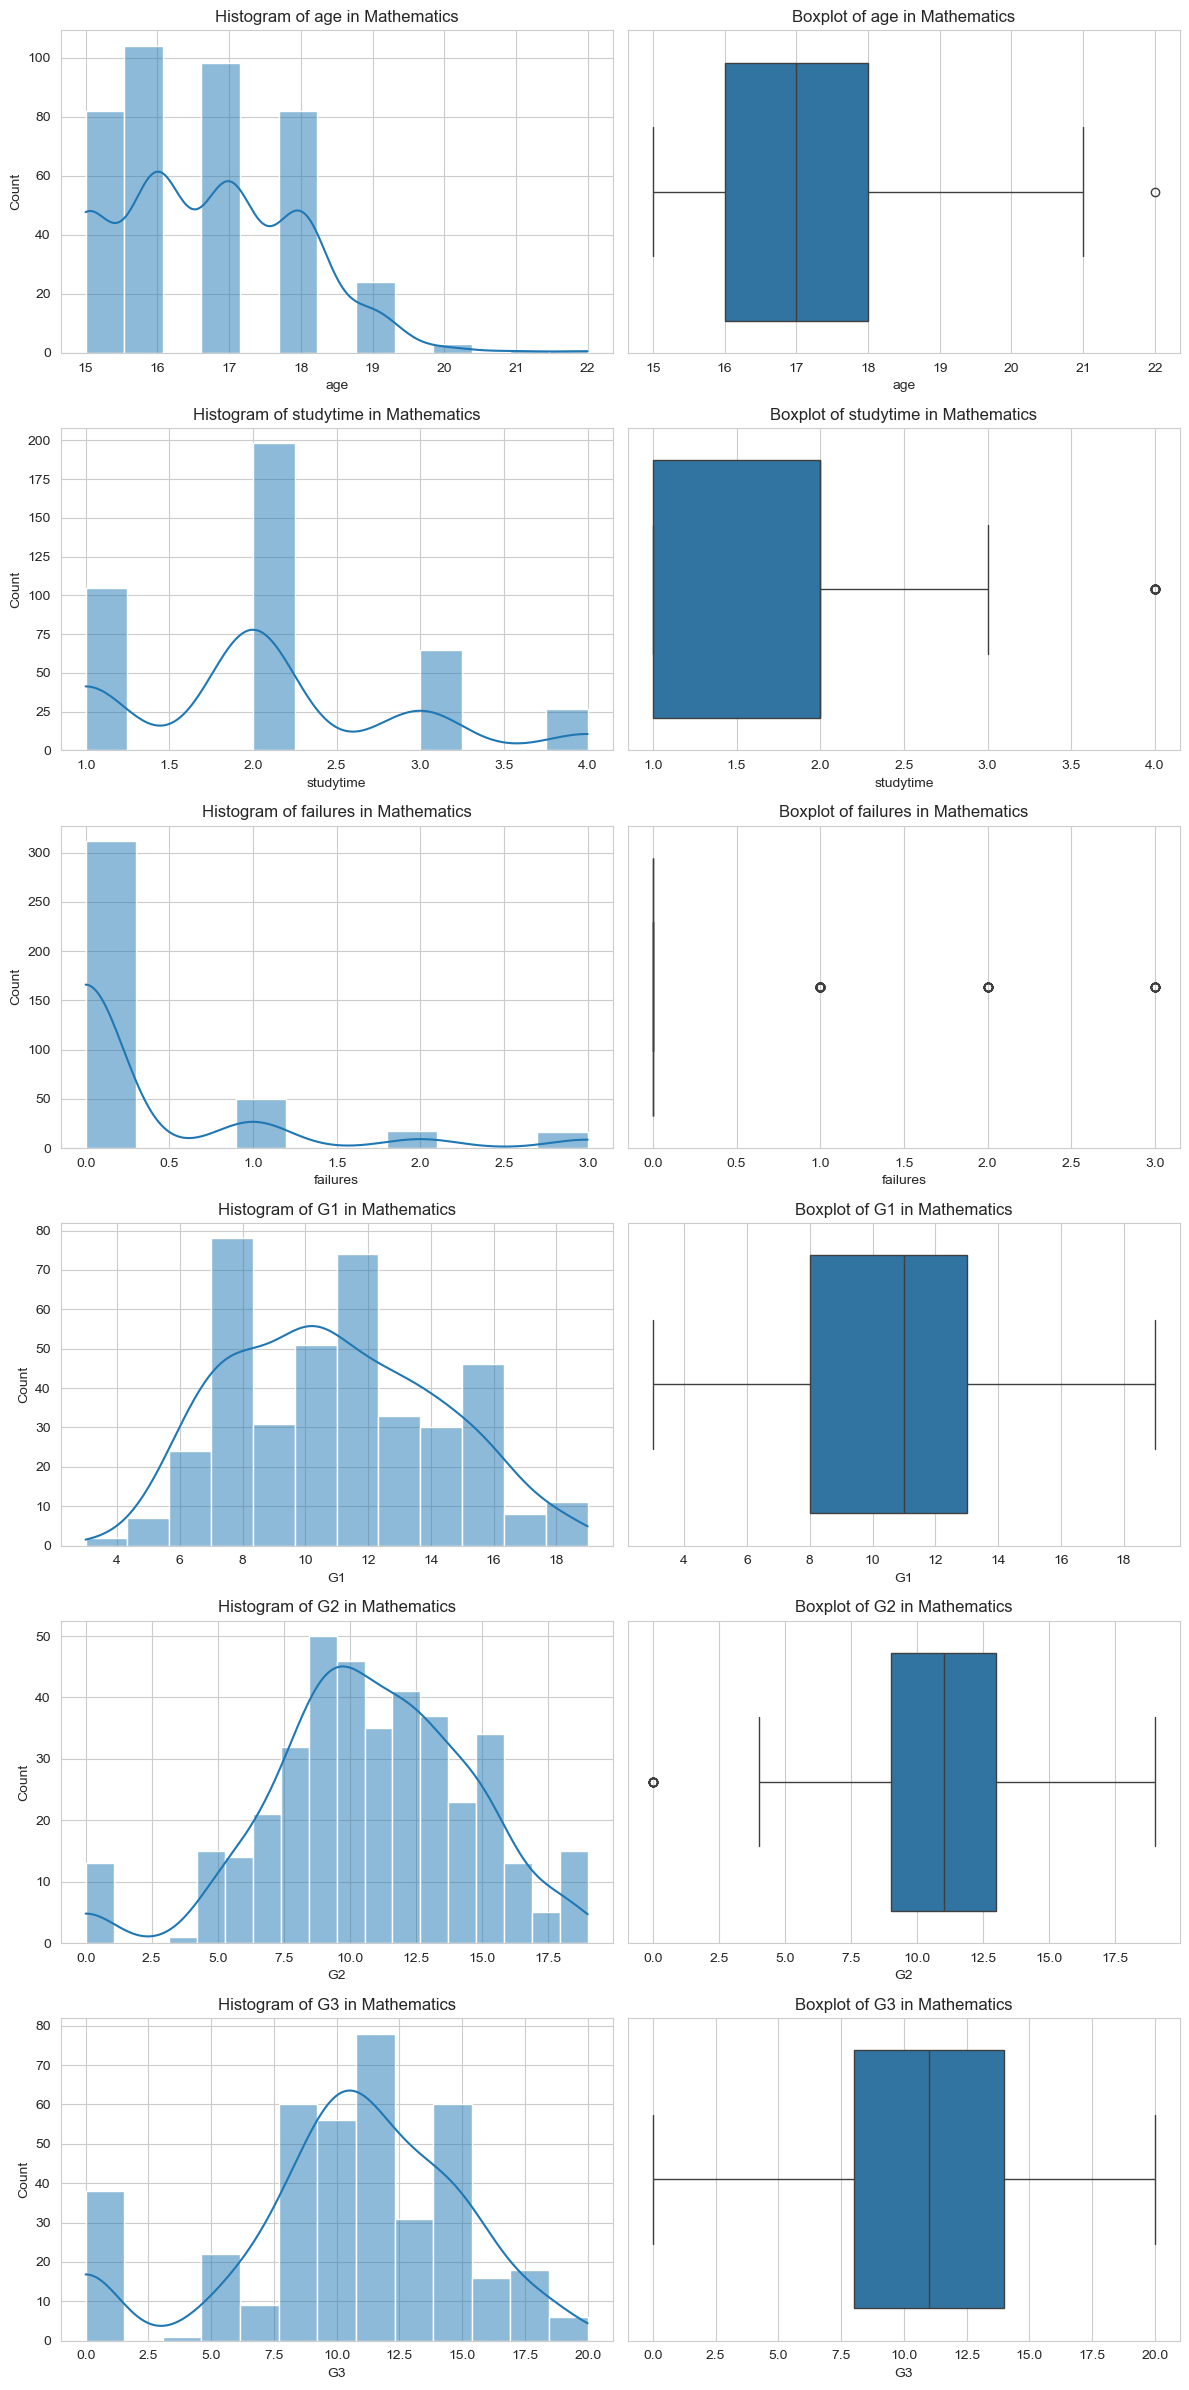

In [18]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']

# Plotting for Mathematics dataset
plot_histograms_boxplots(mat_data, columns_of_interest, 'Mathematics')
plt.show()

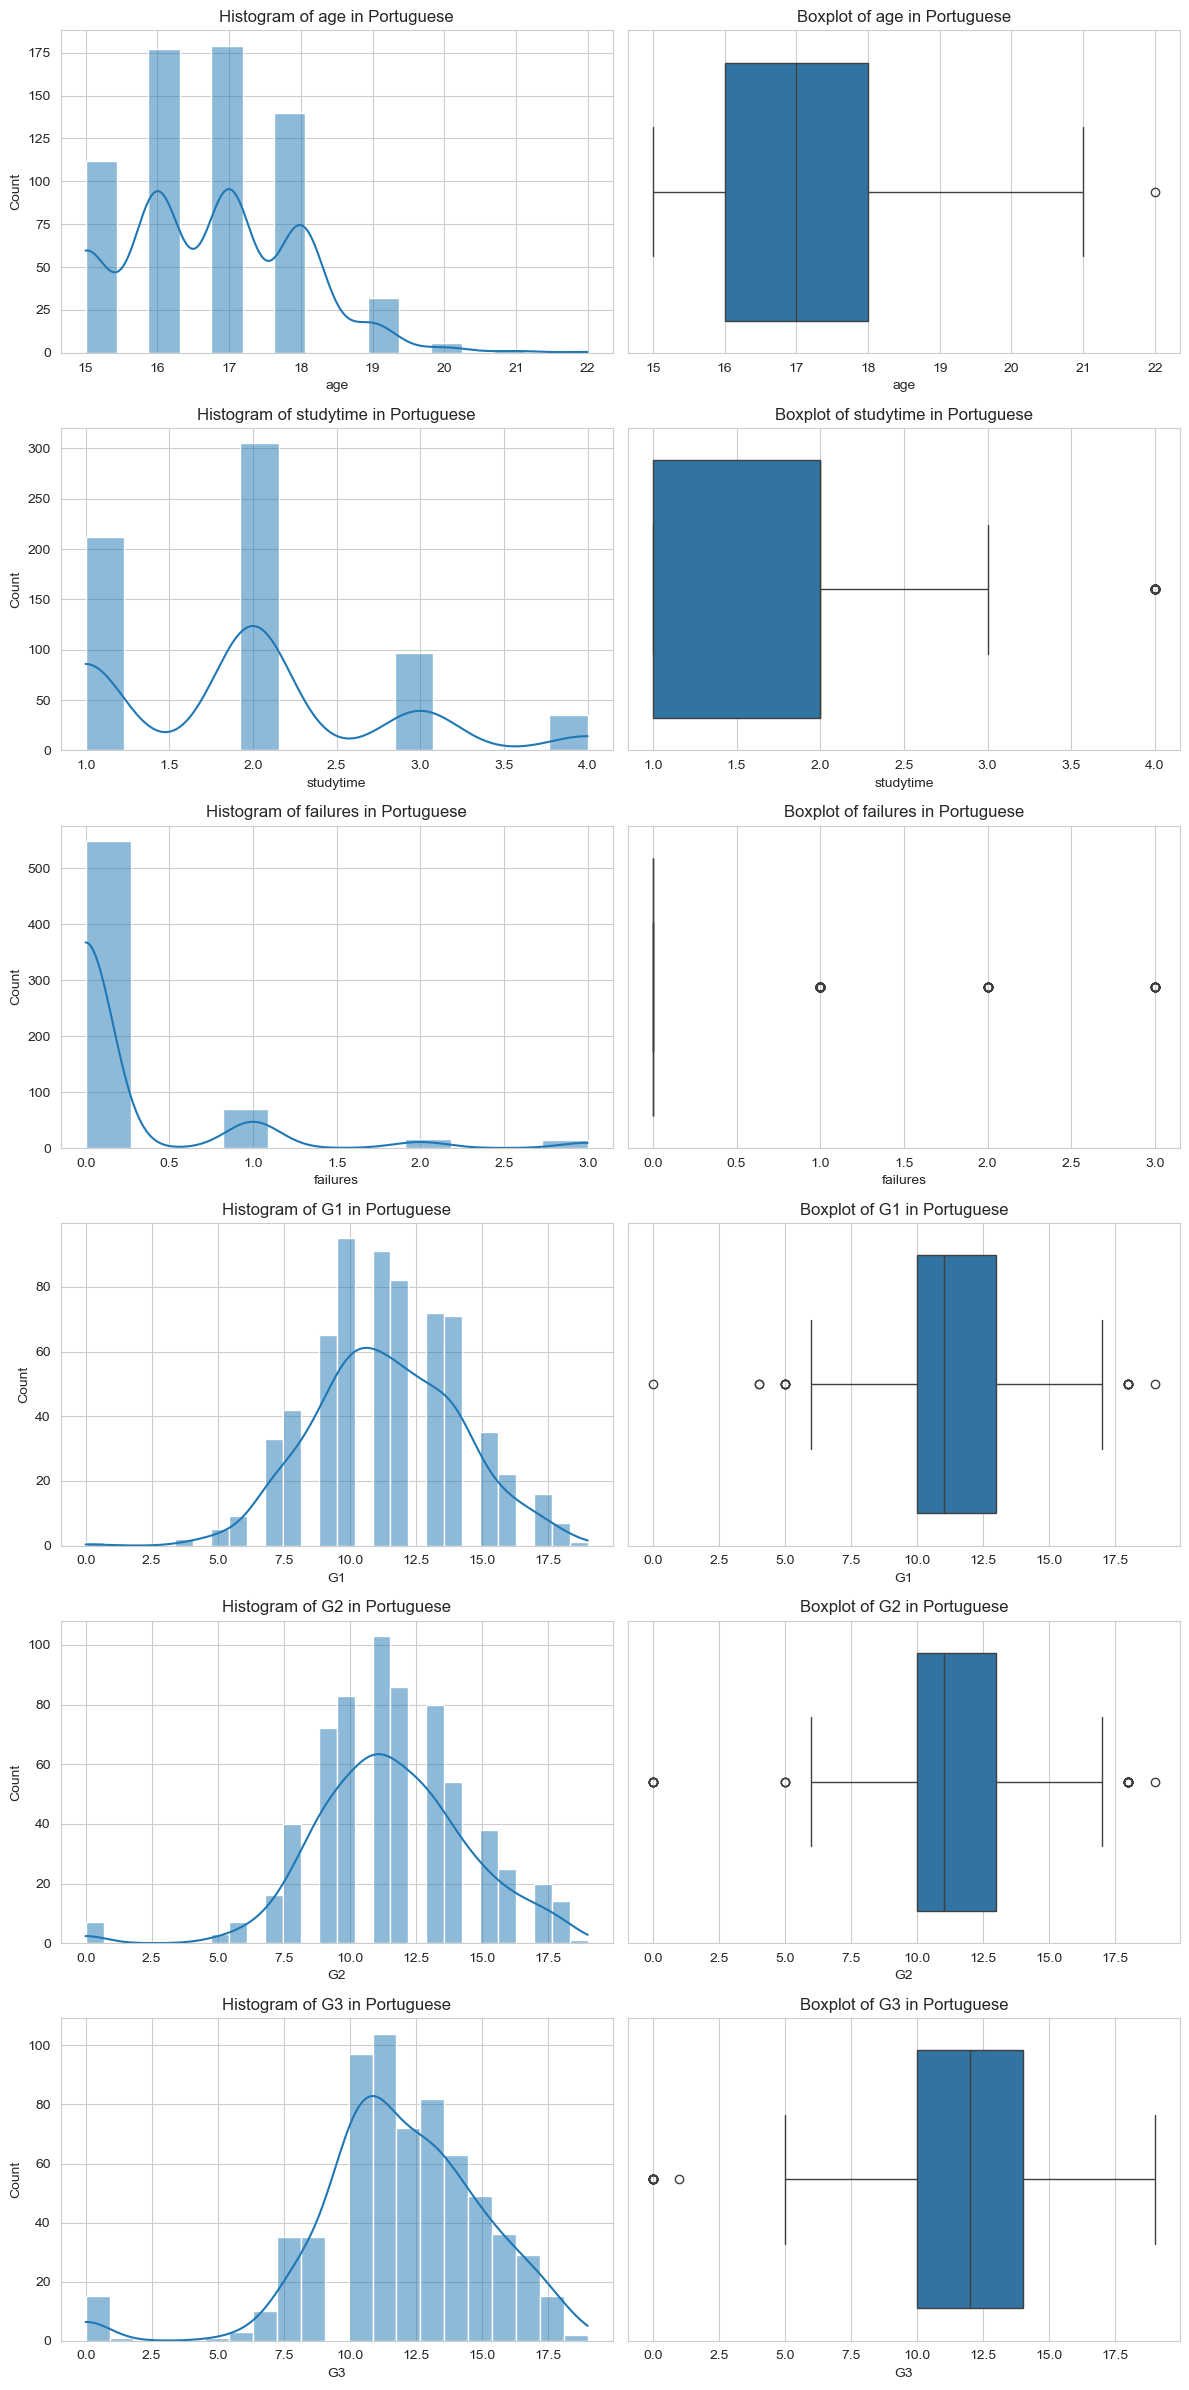

In [19]:
# Plotting for Portuguese dataset
plot_histograms_boxplots(por_data, columns_of_interest, 'Portuguese')
plt.show()

## Chi-Square Test for the Portuguese Language Dataset

In [20]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [21]:
# Let us create a grade category in order to simplify the numerical gradings of G3 into Fail,Pass and Excellent

In [22]:
por_data['grade_cat'] = pd.cut(
    por_data['G3'].round(),
    bins=[0, 9, 14, 20],
    labels=['Fail', 'Pass', 'Excellent'],
    include_lowest=True
)

In [23]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Pass


In [24]:
# 1.Gender and Academic Performance': ('sex', 'grade_cat')

In [25]:
# Question: Is the proportion of grades different across genders?

In [26]:
cont_gender= pd.crosstab(por_data['sex'], por_data['grade_cat'])
cont_gender

grade_cat,Fail,Pass,Excellent
sex,,,
F,50,245,88
M,50,173,43


In [27]:
# Hypothesis

In [28]:
alpha = 0.05

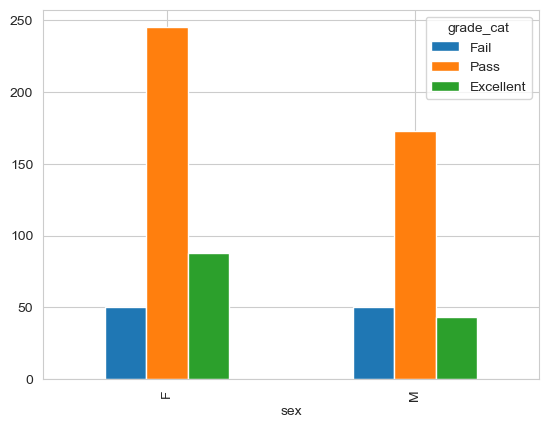

In [29]:
cont_gender.plot(kind='bar')
plt.show()

In [30]:


res = chi2_contingency(cont_gender)

In [31]:
res.pvalue.item()<0.05

True

In [32]:
# since the pvalue is less than the signficance level, we reject the null hypothesis

In [33]:
# 2.Internet Access and Academic Performance': ('internet', 'grade_cat')

In [34]:
# Question: Is the proportion of grades different for having internet access or not?

In [35]:
cont_internet= pd.crosstab(por_data['internet'], por_data['grade_cat'])
cont_internet

grade_cat,Fail,Pass,Excellent
internet,,,
no,32,100,19
yes,68,318,112


In [36]:
# Hypothesis

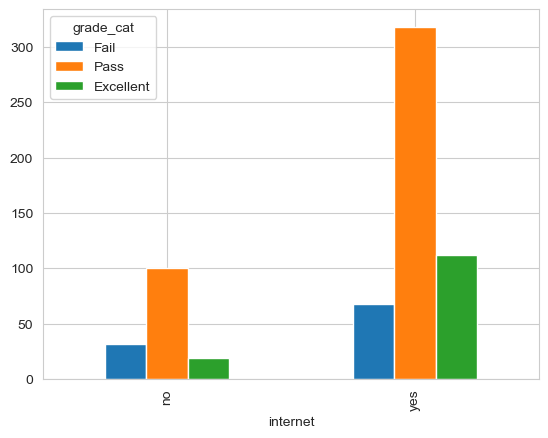

In [37]:
cont_internet.plot(kind='bar')
plt.show()

In [38]:
res = chi2_contingency(cont_internet)

In [39]:
res.pvalue.item()<0.05

True

In [40]:
# since the pvalue is less than the signficance level, we reject the null hypothesis

In [41]:
#3. Family Educational Background and Performance': ('Medu', 'grade_cat')

In [42]:
# Question: Is the proportion of grades different on the basis educational background of mother?

In [43]:
cont_medu= pd.crosstab(por_data['Medu'], por_data['grade_cat'])
cont_medu

grade_cat,Fail,Pass,Excellent
Medu,,,
0,0,5,1
1,37,93,13
2,27,129,30
3,22,87,30
4,14,104,57


In [44]:
# (0 - None, 1 - Primary, 2 - 5th to 9th grade, 3 - Secondary, 4 - Higher education).
new_axis = {0:'None',1:'Primary',2:'5th to 9th grad',3:'Secondary',4:'Higher education'}
cont_medu.rename(new_axis,inplace = True)

In [45]:
cont_medu

grade_cat,Fail,Pass,Excellent
Medu,,,
None,0,5,1
Primary,37,93,13
5th to 9th grad,27,129,30
Secondary,22,87,30
Higher education,14,104,57


In [46]:
# Hypothesis

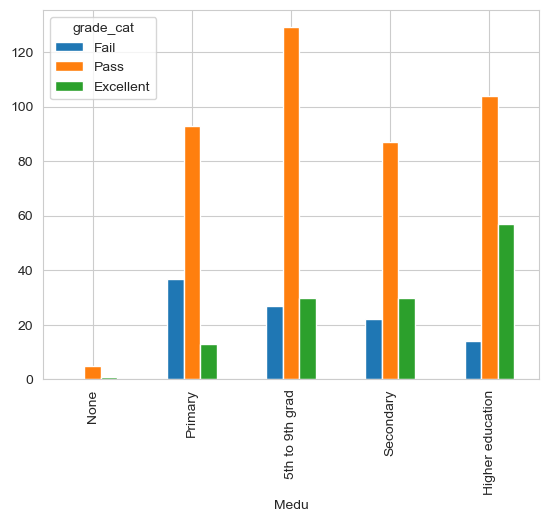

In [47]:
cont_medu.plot(kind='bar')
plt.show()

In [48]:
res = chi2_contingency(cont_medu)

In [49]:
res.pvalue.item()<0.05

True

In [50]:
# since the pvalue is less than the signficance level, we reject the null hypothesis

In [51]:
## Chi-Square Test for Math Language Dataset

In [52]:
mat_data['grade_cat'] = pd.cut(
    por_data['G3'].round(),
    bins=[0, 9, 14, 20],
    labels=['Fail', 'Pass', 'Excellent'],
    include_lowest=True
)

In [53]:
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_cat
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Pass


In [54]:
## Create a function to simplify the above repeatative tasks


In [55]:
# Defining a function to perform the Chi-Square Test and interpret results
def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    return chi2, p, significant

In [56]:
# Additional aspects to test in the Mathematics dataset
additional_aspects_to_test = {
    'School Support and Academic Performance': ('schoolsup', 'grade_cat'),
    'Family Support and Grades': ('famsup', 'G3'),
    'Extra-Curricular Activities and Performance': ('activities', 'grade_cat'),
    'Romantic Relationships and Academic Performance': ('romantic', 'grade_cat'),
    'Health Status and Grades': ('health', 'grade_cat')
}

In [57]:
# Performing the additional tests for Mathematics dataset
additional_mat_chi_square_results = {aspect: perform_chi_square_test(mat_data, *columns) for aspect, columns in additional_aspects_to_test.items()}

additional_mat_chi_square_results

{'School Support and Academic Performance': (np.float64(8.885914665821728),
  np.float64(0.011761105534306602),
  np.True_),
 'Family Support and Grades': (np.float64(13.691883206082325),
  np.float64(0.688779619694134),
  np.False_),
 'Extra-Curricular Activities and Performance': (np.float64(1.027258986566239),
  np.float64(0.5983200345922339),
  np.False_),
 'Romantic Relationships and Academic Performance': (np.float64(0.4568108852482679),
  np.float64(0.7958015425525011),
  np.False_),
 'Health Status and Grades': (np.float64(9.40486205102891),
  np.float64(0.309301139895212),
  np.False_)}

In [58]:
for key,values in additional_mat_chi_square_results.items():
    print(f'P-value of {key} is {values[1]:.3f}')
    if values[1]<0.05:
        print(f'Reject the null hypothesis')
    else:
        print(f'Fail to reject the null hypothesis')
    

P-value of School Support and Academic Performance is 0.012
Reject the null hypothesis
P-value of Family Support and Grades is 0.689
Fail to reject the null hypothesis
P-value of Extra-Curricular Activities and Performance is 0.598
Fail to reject the null hypothesis
P-value of Romantic Relationships and Academic Performance is 0.796
Fail to reject the null hypothesis
P-value of Health Status and Grades is 0.309
Fail to reject the null hypothesis


In [59]:
# Apply t-tests to compare the mean grades between two different groups, such as students from urban versus rural areas.

In [60]:
## 1. Prove (or disprove) that the mean grades of the students from urban areas is greater than those from rural areas? (t-test Right tailed)

In [61]:
mat_data.groupby('address')['G3'].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,88.0,9.511364,4.556149,0.0,7.0,10.0,12.0,19.0
U,307.0,10.674267,4.563075,0.0,9.0,11.0,14.0,20.0


In [62]:
# significancelevel alpha
alpha=0.05

In [63]:
mat_data.shape

(395, 34)

In [64]:
mat_data['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

In [65]:
rural=mat_data.loc[mat_data['address']=='R']['G3'].sample(88)
urban=mat_data.loc[mat_data['address']=='U']['G3'].sample(88)

In [66]:
urban.var(),rural.var()

(22.55681818181818, 20.758490073145246)

In [67]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(urban, rural,equal_var=False,alternative='greater')
#equal_var=False --> welch test--> doesn't assume variance to be equal

In [68]:
p_value.item()<0.05

True

In [69]:
# Reject the null hypothesis that the mean grades in maths for urban areas student is less/equalto the mean grades of rural area students

In [70]:
###